In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import show_graph, show_multiple_graph, plot_JRX, show_graph_cluster_color
from generator import generate, generate_and_give_tau

from EM import mixtureModel

from EM import get_X_from_graph, main, return_priors_pi, ICL
np.set_printoptions(precision=4, suppress=True)

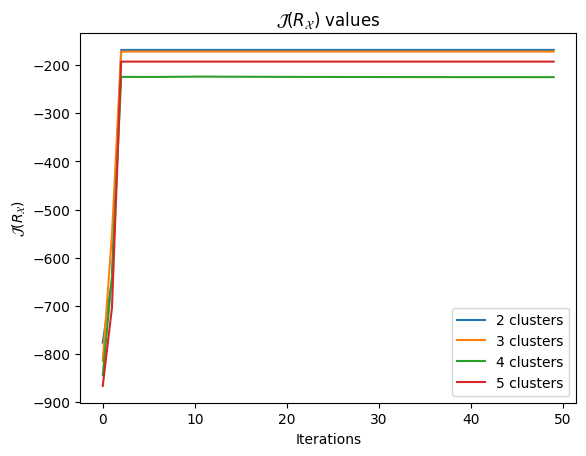

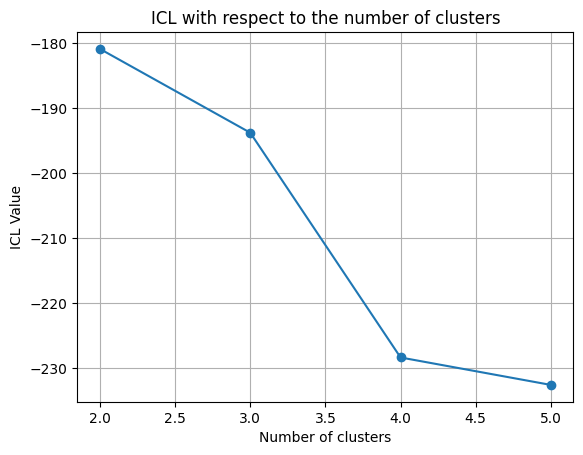

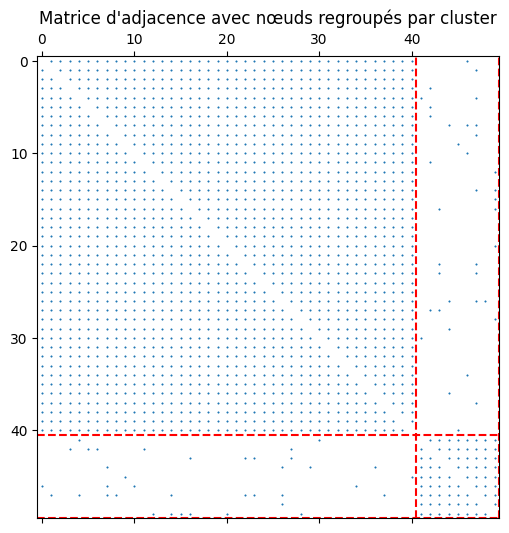

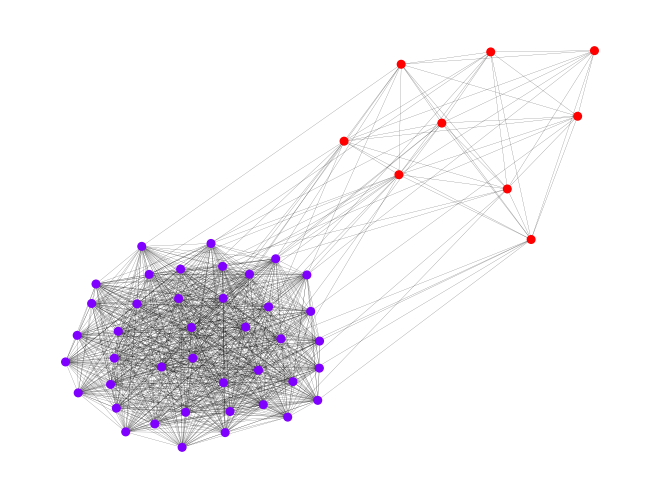

In [2]:
np.random.seed(2)
n_vertices = 50
pi = np.array([[1,0.1],[0.1,1]])
priors = np.array([0.2,0.8])
n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='random')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(2)
show_graph_cluster_color(graph, model.results[2]['tau'])

In this first example, the algorithm works when the tau are estimated with the true ones, but it fails to converge when the tau used to initialize the values are not the good ones

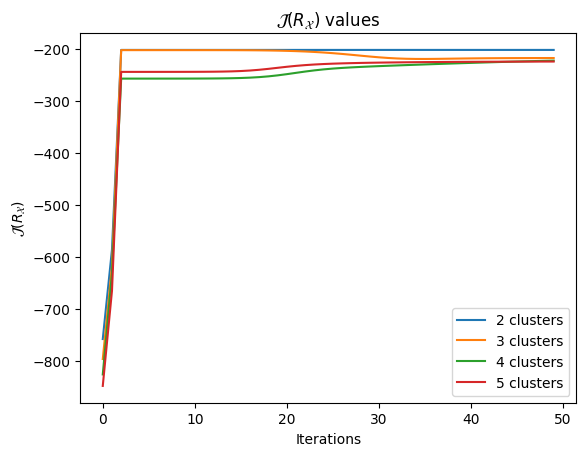

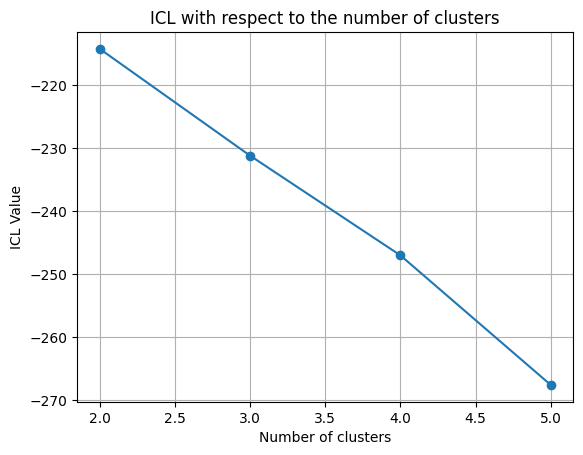

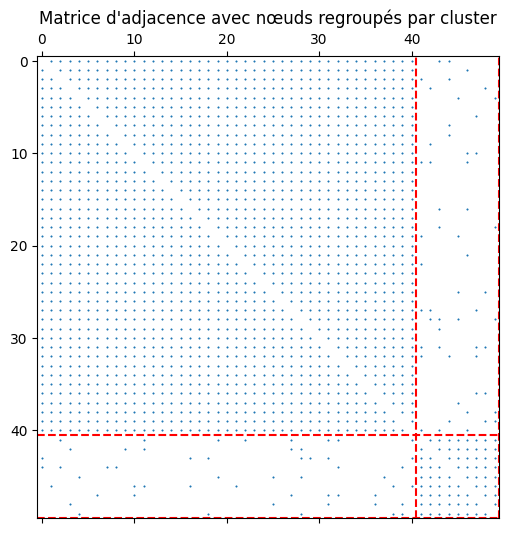

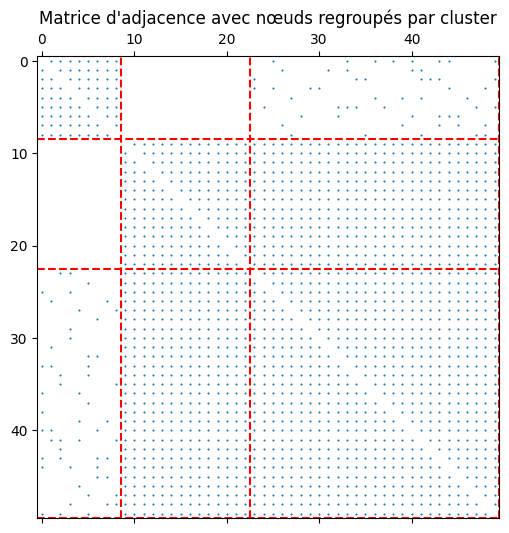

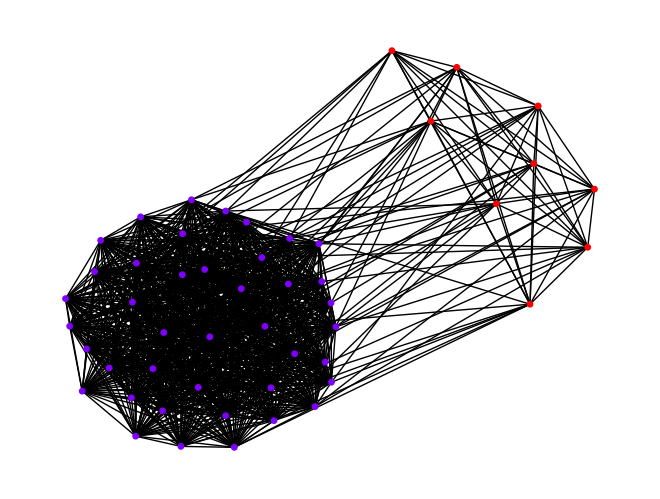

In [4]:
np.random.seed(2)
n_vertices = 50
pi = np.array([[1,0.1],[0.1,1]])
priors = np.array([0.2,0.8])
n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='random')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(2)
model.plot_adjency_matrix(3)
show_graph_cluster_color(graph, model.results[2]['tau'])

/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: divide by zero encountered in log
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: invalid value encountered in multiply
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))


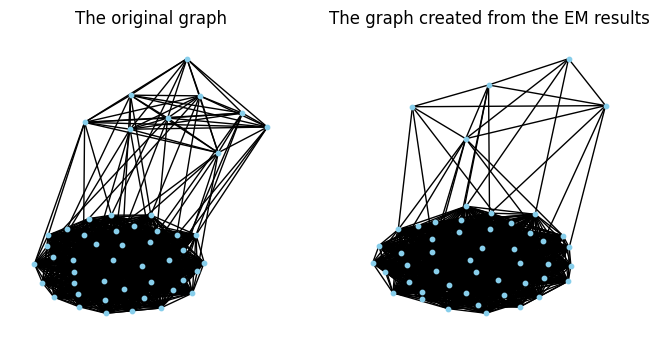

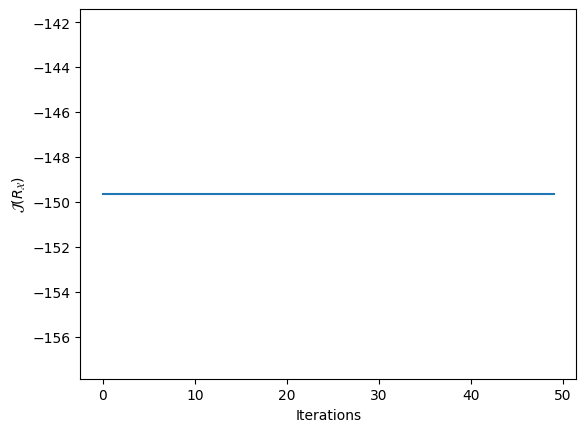

/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:122: RuntimeWarning: divide by zero encountered in log
  exp_term = np.where(exp_term == 0, 0, np.log(exp_term))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: divide by zero encountered in log
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: invalid value encountered in multiply
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))


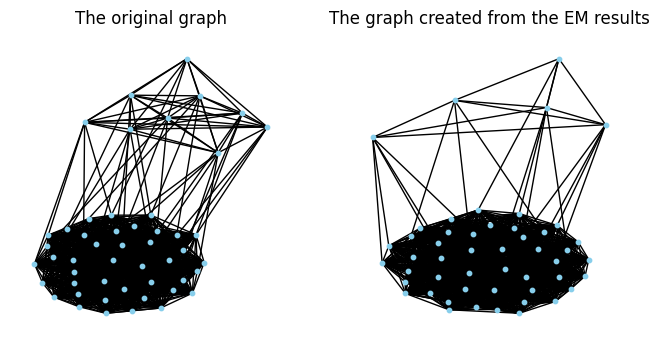

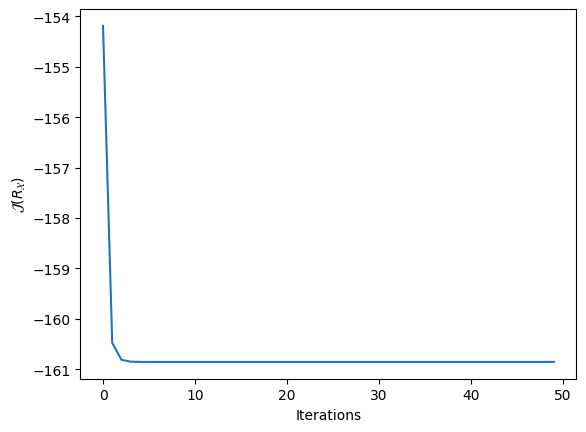

/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:122: RuntimeWarning: divide by zero encountered in log
  exp_term = np.where(exp_term == 0, 0, np.log(exp_term))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: divide by zero encountered in log
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: invalid value encountered in multiply
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))


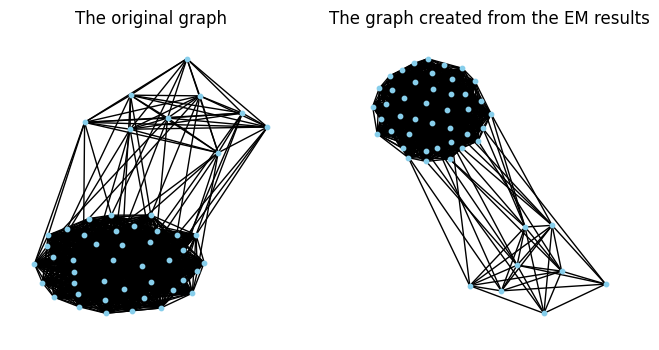

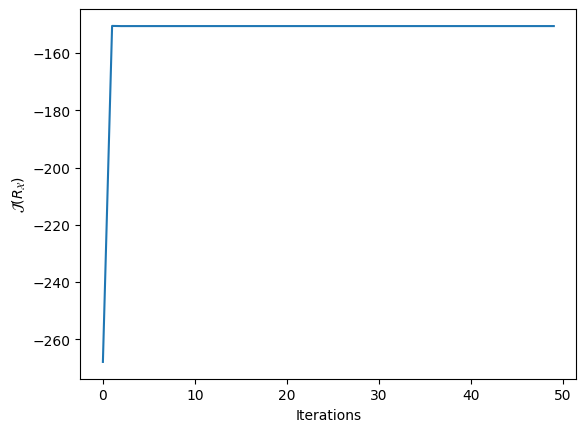

/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:122: RuntimeWarning: divide by zero encountered in log
  exp_term = np.where(exp_term == 0, 0, np.log(exp_term))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: divide by zero encountered in log
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: invalid value encountered in multiply
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))


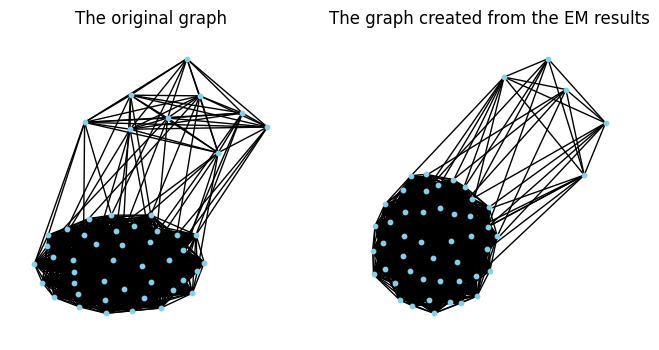

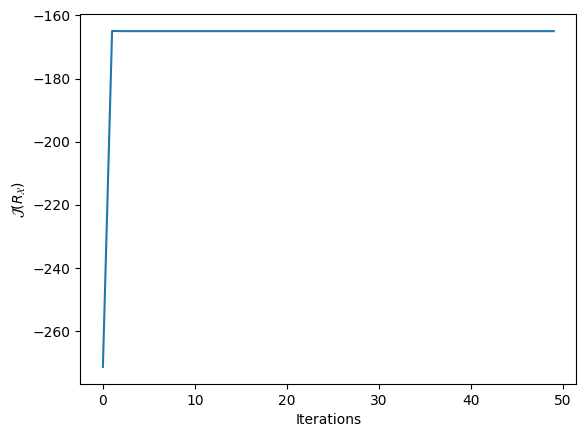

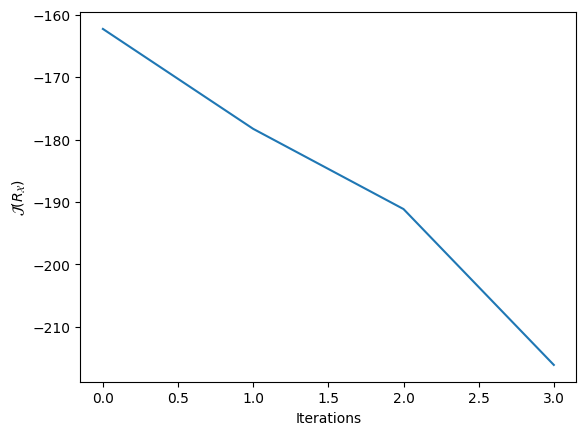

In [2]:
np.random.seed(2)
n_vertices = 50
pi = np.array([[1,0.1],[0.1,1]])
priors = np.array([0.2,0.8])
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

X = get_X_from_graph(graph)

tab_ICL = []

tab_len_clusters = [2,3,4,5]
for n_clusters in tab_len_clusters:

    # emp_prior, emp_pi = return_priors_pi(X, tau.copy())
    # appro_priors, appro_pi = main_with_tau(X, tau.copy(), n_clusters, 50)
    appro_priors, appro_pi, appro_tau, jrx = main(X, n_clusters, max_iter)
    # print("the approximated priors are : ")
    # print(appro_priors)
    # print('And the true one are :')
    # print(emp_prior)
    # print('the approximated pi are :')
    # print(appro_pi)
    # print("and the true one is : ")
    # print(emp_pi)

    np.random.seed(2)
    graph_emp, tau = generate_and_give_tau(n_vertices, appro_pi , appro_priors)
    show_multiple_graph([graph, graph_emp], ["The original graph", "The graph created from the EM results"], with_labels=False, node_size=10, font_size=1)
    plot_JRX(jrx)
    tab_ICL.append(ICL(X, appro_tau, appro_pi, appro_priors))
plot_JRX(tab_ICL)

the approximated priors are : 
[0.8 0.2]
And the true one are :
[0.8 0.2]
the approximated pi are :
[[0.875 0.   ]
 [0.    0.5  ]]
and the true one is : 
[[0.875 0.   ]
 [0.    0.5  ]]


/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:122: RuntimeWarning: divide by zero encountered in log
  exp_term = np.where(exp_term == 0, 0, np.log(exp_term))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: divide by zero encountered in log
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: invalid value encountered in multiply
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))


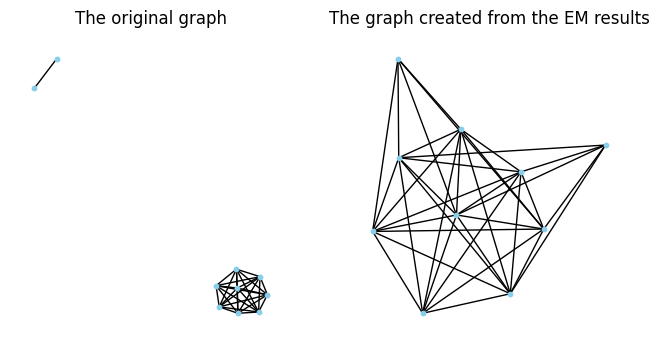

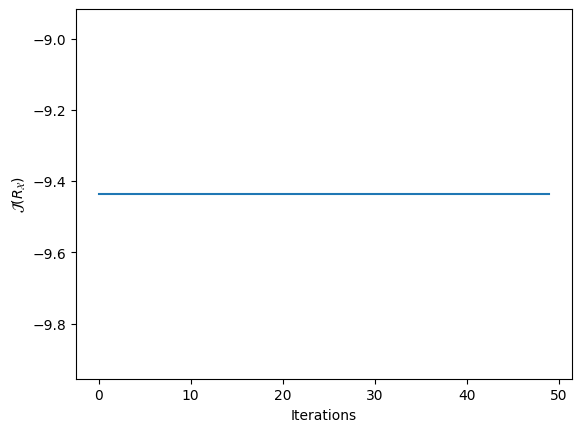

In [3]:
np.random.seed(2)
n_vertices = 10
pi = np.array([[1,0],[0,1]])
priors = np.array([0.5,0.5])
n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

X = get_X_from_graph(graph)
emp_prior, emp_pi = return_priors_pi(X, tau.copy())
# appro_priors, appro_pi = main_with_tau(X, tau.copy(), n_clusters, 50)
appro_priors, appro_pi, jrx = main(X, n_clusters, max_iter)
print("the approximated priors are : ")
print(appro_priors)
print('And the true one are :')
print(emp_prior)
print('the approximated pi are :')
print(appro_pi)
print("and the true one is : ")
print(emp_pi)

np.random.seed(2)
graph_emp, tau = generate_and_give_tau(n_vertices, appro_pi , appro_priors)
show_multiple_graph([graph, graph_emp], ["The original graph", "The graph created from the EM results"], with_labels=False, node_size=10, font_size=1)
plot_JRX(jrx)

the approximated priors are : 
[0.2 0.8]
And the true one are :
[0.2 0.8]
the approximated pi are :
[[0. 1.]
 [1. 0.]]
and the true one is : 
[[0. 1.]
 [1. 0.]]


/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: divide by zero encountered in log
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: invalid value encountered in multiply
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:122: RuntimeWarning: divide by zero encountered in log
  exp_term = np.where(exp_term == 0, 0, np.log(exp_term))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:101: RuntimeWarning: invalid value encountered in divide
  tau = tau / tau.sum(axis=1, keepdims=True)


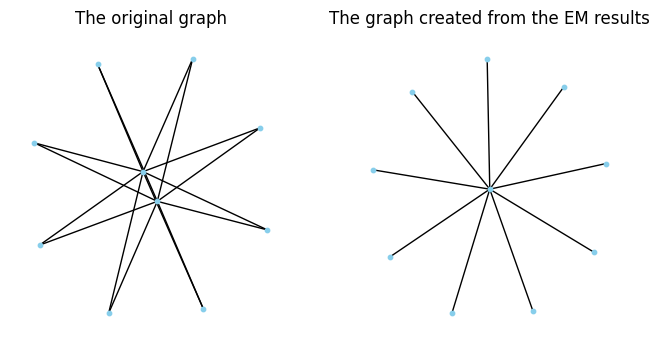

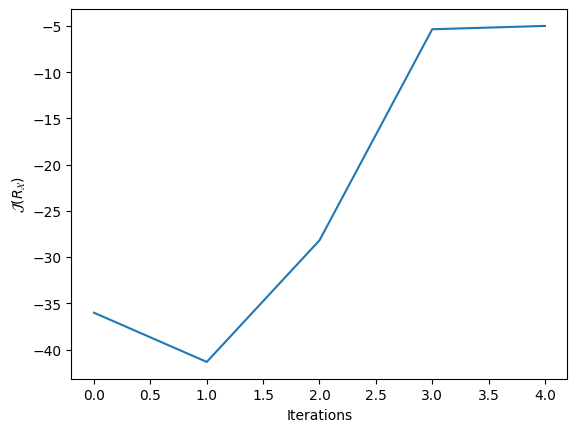

In [4]:
np.random.seed(1)
n_vertices = 10
pi = np.array([[0,1],[1,0]])
priors = np.array([0.1,0.9])
n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

X = get_X_from_graph(graph)
emp_prior, emp_pi = return_priors_pi(X, tau.copy())
# appro_priors, appro_pi = main_with_tau(X, tau.copy(), n_clusters, 50)
appro_priors, appro_pi, jrx = main(X, n_clusters, max_iter)
print("the approximated priors are : ")
print(appro_priors)
print('And the true one are :')
print(emp_prior)
print('the approximated pi are :')
print(appro_pi)
print("and the true one is : ")
print(emp_pi)

np.random.seed(2)
graph_emp, tau = generate_and_give_tau(n_vertices, appro_pi , appro_priors)
show_multiple_graph([graph, graph_emp], ["The original graph", "The graph created from the EM results"], with_labels=False, node_size=10, font_size=1)
plot_JRX(jrx)

/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: divide by zero encountered in log
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: invalid value encountered in multiply
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))


the approximated priors are : 
[0.5 0.5]
And the true one are :
[0.5 0.5]
the approximated pi are :
[[0.8333 0.1667]
 [0.1667 0.8333]]
and the true one is : 
[[0.8333 0.1667]
 [0.1667 0.8333]]


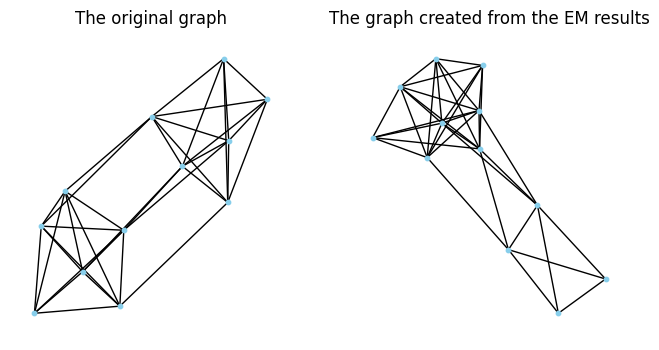

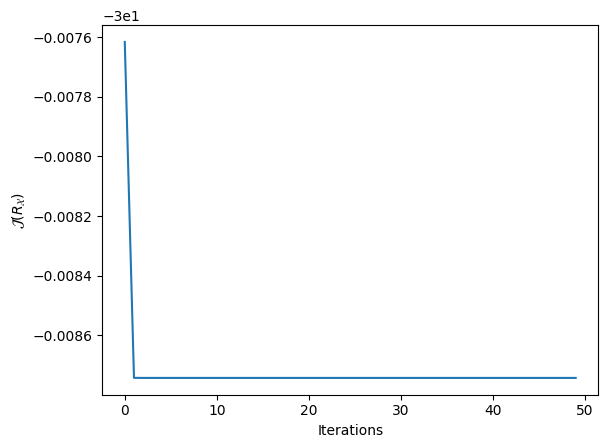

In [7]:
n_vertices = 12
pi = np.array([[1,0.1],[0.1,1]])
priors = np.array([0.2,0.8])
n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

X = get_X_from_graph(graph)
emp_prior, emp_pi = return_priors_pi(X, tau.copy())
# appro_priors, appro_pi = main_with_tau(X, tau.copy(), n_clusters, 50)
appro_priors, appro_pi, jrx = main(X, n_clusters, max_iter)
print("the approximated priors are : ")
print(appro_priors)
print('And the true one are :')
print(emp_prior)
print('the approximated pi are :')
print(appro_pi)
print("and the true one is : ")
print(emp_pi)

np.random.seed(2)
graph_emp, tau = generate_and_give_tau(n_vertices, appro_pi , appro_priors)
show_multiple_graph([graph, graph_emp], ["The original graph", "The graph created from the EM results"], with_labels=False, node_size=10, font_size=1)
plot_JRX(jrx)

/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: divide by zero encountered in log
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: invalid value encountered in multiply
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:122: RuntimeWarning: divide by zero encountered in log
  exp_term = np.where(exp_term == 0, 0, np.log(exp_term))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:116: RuntimeWarning: divide by zero encountered in log
  tau_log_priors = np.where(priors == 0, 0, tau * np.log(priors))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4

the approximated priors are : 
[0.48 0.   0.   0.52]
And the true one are :
[0.08 0.42 0.44 0.06]
the approximated pi are :
[[0.0833 0.     0.     0.9808]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.9808 0.     0.     0.068 ]]
and the true one is : 
[[0.     1.     0.0909 0.    ]
 [1.     0.0635 1.     0.1587]
 [0.0909 1.     0.062  1.    ]
 [0.     0.1587 1.     0.    ]]


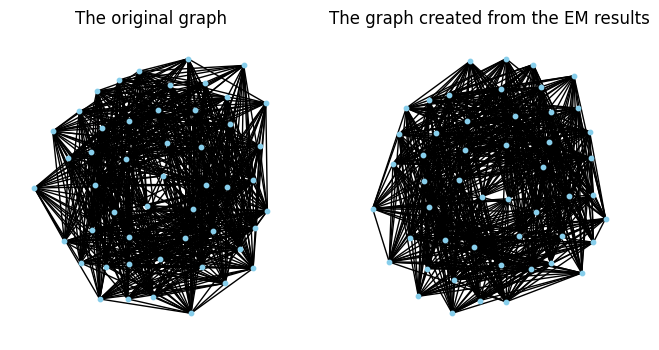

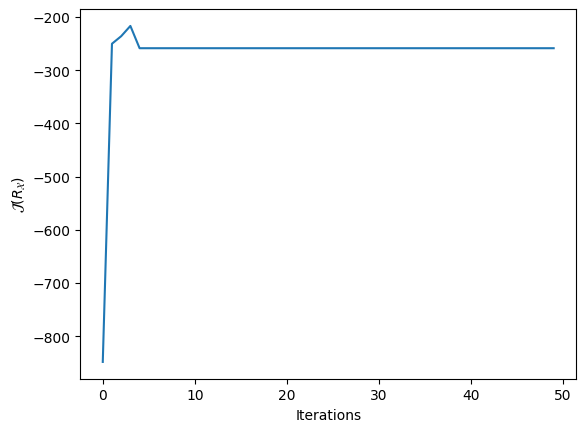

In [6]:
n_vertices = 50
pi = np.array([[0.1,1,0.1,0.1],[1,0.1,1,0.1],[0.1,1,0.1,1],[0.1,0.1,1,0.1]])
priors = np.array([0.1, 0.4, 0.4, 0.1])
n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

X = get_X_from_graph(graph)
emp_prior, emp_pi = return_priors_pi(X, tau.copy())
# appro_priors, appro_pi = main_with_tau(X, tau.copy(), n_clusters, 50)
appro_priors, appro_pi, jrx = main(X, n_clusters, max_iter)
print("the approximated priors are : ")
print(appro_priors)
print('And the true one are :')
print(emp_prior)
print('the approximated pi are :')
print(appro_pi)
print("and the true one is : ")
print(emp_pi)

np.random.seed(2)
graph_emp, tau = generate_and_give_tau(n_vertices, appro_pi , appro_priors)
show_multiple_graph([graph, graph_emp], ["The original graph", "The graph created from the EM results"], with_labels=False, node_size=10, font_size=1)
plot_JRX(jrx)

/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: divide by zero encountered in log
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: invalid value encountered in multiply
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))


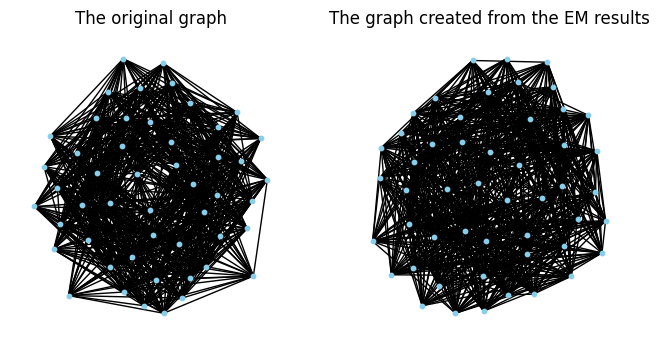

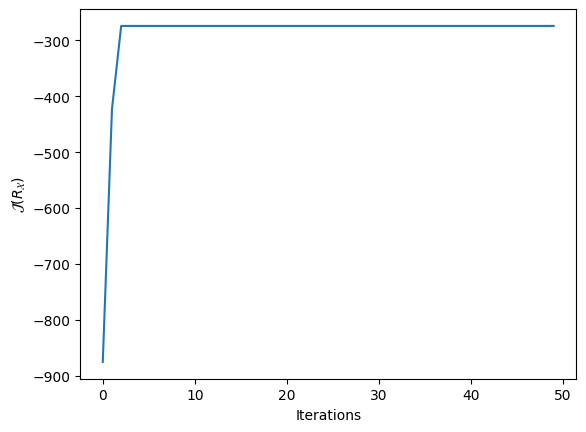

/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: divide by zero encountered in log
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: invalid value encountered in multiply
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:122: RuntimeWarning: divide by zero encountered in log
  exp_term = np.where(exp_term == 0, 0, np.log(exp_term))


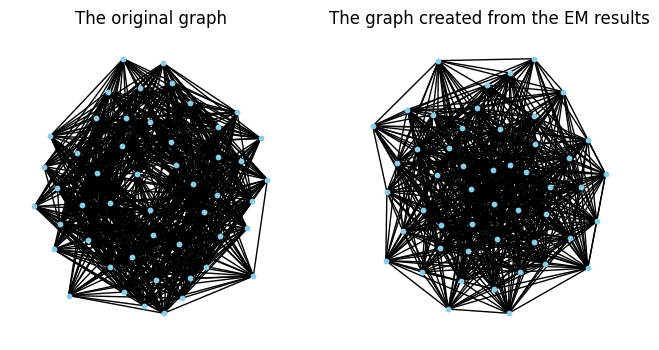

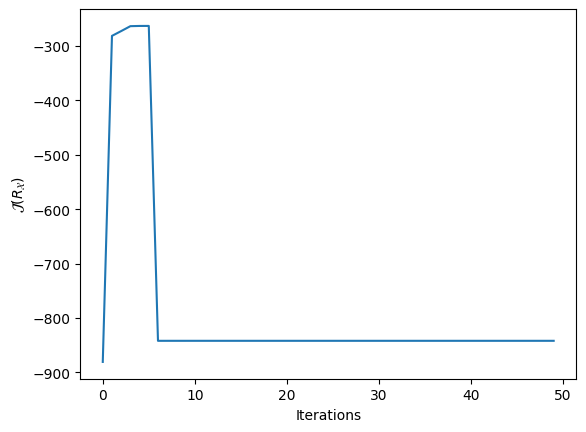

/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: divide by zero encountered in log
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:132: RuntimeWarning: invalid value encountered in multiply
  tau_log_tau = np.where(tau == 0, 0, tau * np.log(tau))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:122: RuntimeWarning: divide by zero encountered in log
  exp_term = np.where(exp_term == 0, 0, np.log(exp_term))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:116: RuntimeWarning: divide by zero encountered in log
  tau_log_priors = np.where(priors == 0, 0, tau * np.log(priors))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4

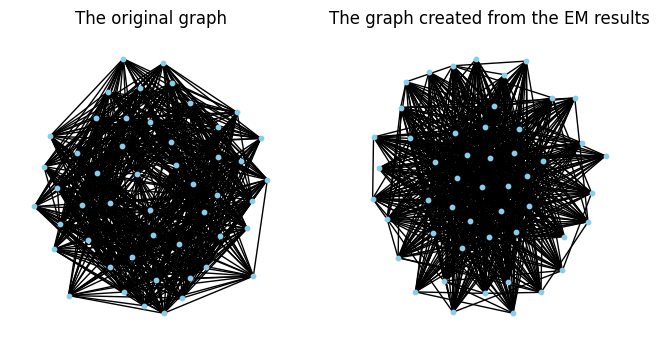

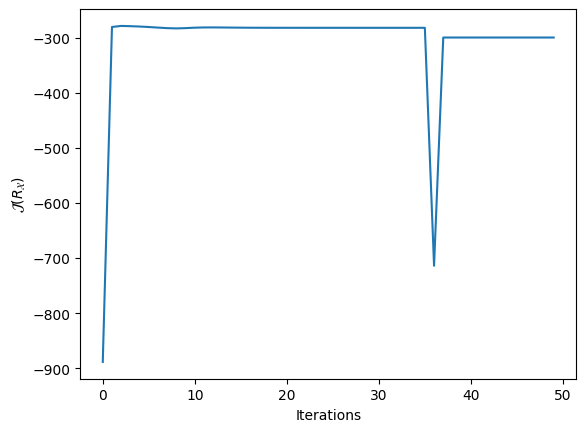

/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:148: RuntimeWarning: divide by zero encountered in log
  Z_log_priors = np.where(priors == 0, 0, Z * np.log(priors))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:148: RuntimeWarning: invalid value encountered in multiply
  Z_log_priors = np.where(priors == 0, 0, Z * np.log(priors))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:154: RuntimeWarning: divide by zero encountered in log
  exp_term = np.where(exp_term == 0, 0, np.log(exp_term))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:122: RuntimeWarning: divide by zero encountered in log
  exp_term = np.where(exp_term == 0, 0, np.log(exp_term))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixtur

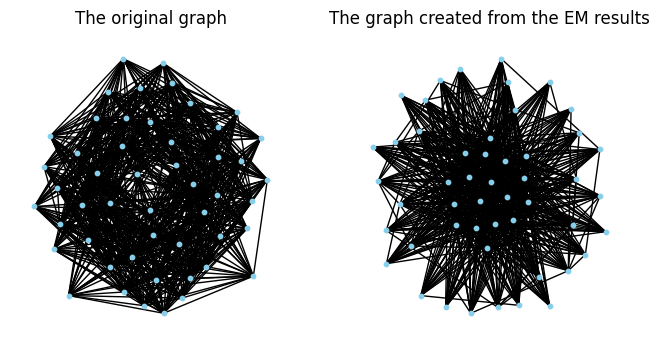

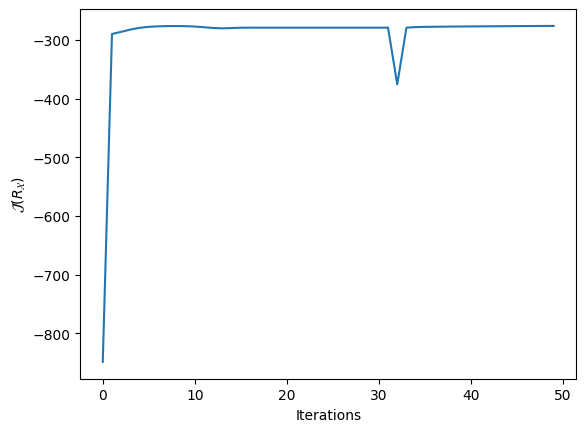

/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:148: RuntimeWarning: divide by zero encountered in log
  Z_log_priors = np.where(priors == 0, 0, Z * np.log(priors))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:148: RuntimeWarning: invalid value encountered in multiply
  Z_log_priors = np.where(priors == 0, 0, Z * np.log(priors))
/Users/potosacho/Desktop/MVA/P1/Probabilistic Graphical Models and Deep Generative Models/Mixture4graph/EM.py:154: RuntimeWarning: divide by zero encountered in log
  exp_term = np.where(exp_term == 0, 0, np.log(exp_term))


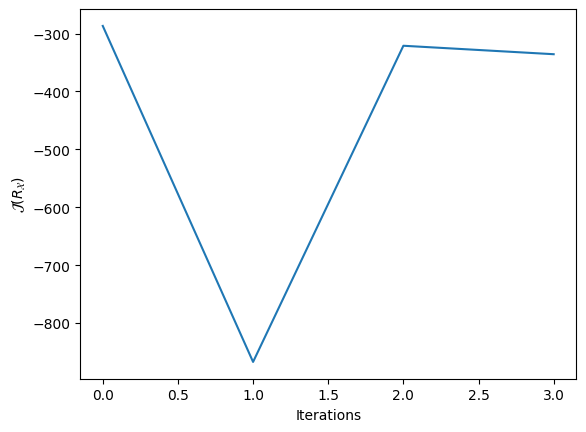

In [3]:
np.random.seed(2)
n_vertices = 50
pi = np.array([[0.1,1,0.1,0.1],[1,0.1,1,0.1],[0.1,1,0.1,1],[0.1,0.1,1,0.1]])
priors = np.array([0.1, 0.4, 0.4, 0.1])
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

X = get_X_from_graph(graph)

tab_ICL = []

tab_len_clusters = [2,3,4,5]
for n_clusters in tab_len_clusters:

    # emp_prior, emp_pi = return_priors_pi(X, tau.copy())
    # appro_priors, appro_pi = main_with_tau(X, tau.copy(), n_clusters, 50)
    appro_priors, appro_pi, appro_tau, jrx = main(X, n_clusters, max_iter)
    # print("the approximated priors are : ")
    # print(appro_priors)
    # print('And the true one are :')
    # print(emp_prior)
    # print('the approximated pi are :')
    # print(appro_pi)
    # print("and the true one is : ")
    # print(emp_pi)

    np.random.seed(2)
    graph_emp, tau = generate_and_give_tau(n_vertices, appro_pi , appro_priors)
    show_multiple_graph([graph, graph_emp], ["The original graph", "The graph created from the EM results"], with_labels=False, node_size=10, font_size=1)
    plot_JRX(jrx)
    tab_ICL.append(ICL(X, appro_tau, appro_pi, appro_priors))
plot_JRX(tab_ICL)

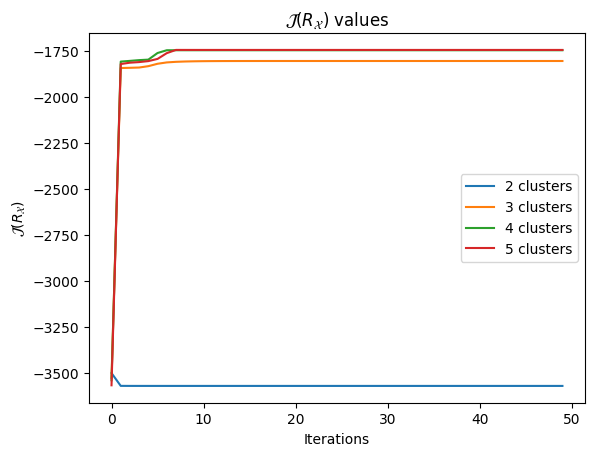

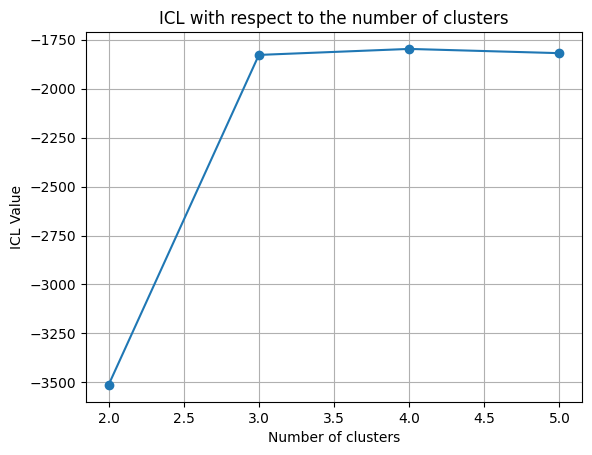

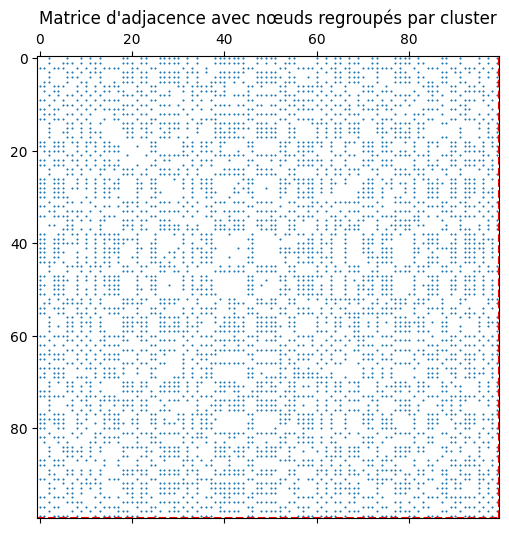

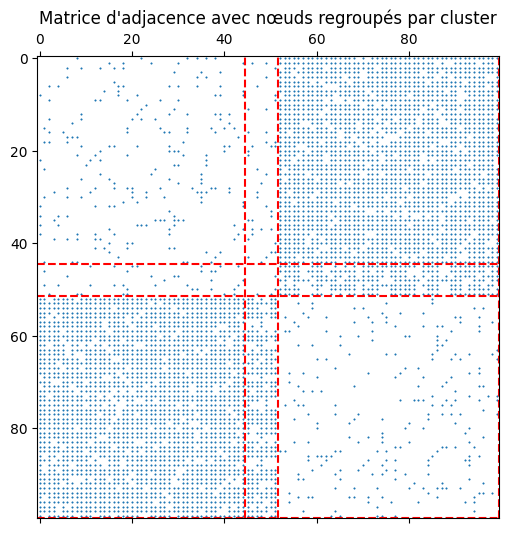

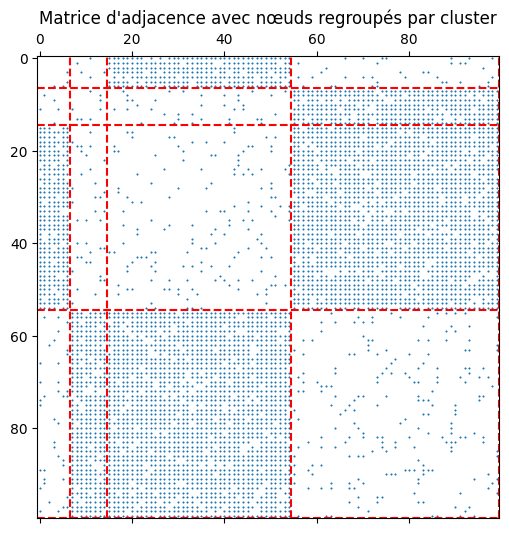

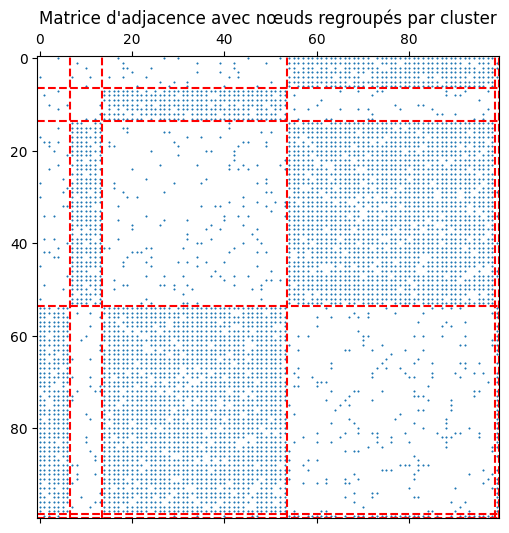

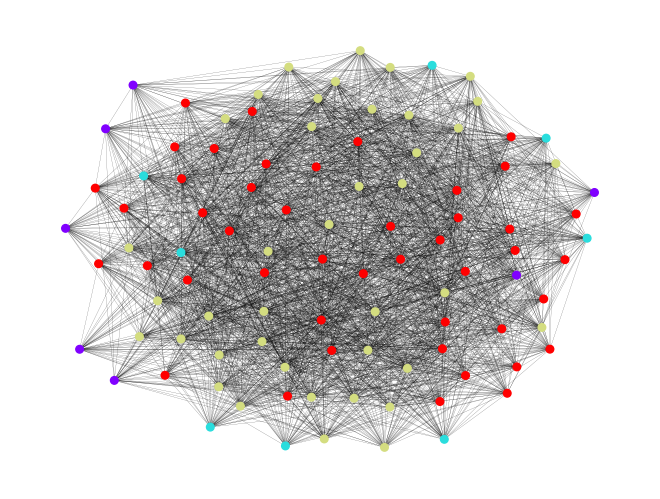

In [6]:
np.random.seed(3)
n_vertices = 100
pi = np.array([[0.1,0.9,0.1,0.1],[0.9,0.1,0.9,0.1],[0.1,0.9,0.1,0.9],[0.1,0.1,0.9,0.1]])
priors = np.array([0.1, 0.4, 0.4, 0.1])
n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='spectral')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(2)
model.plot_adjency_matrix(3)
model.plot_adjency_matrix(4)
model.plot_adjency_matrix(5)

show_graph_cluster_color(graph, model.results[4]['tau'])